### Kütüphaneler

In [933]:
import numpy as np
import pandas as pd 
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB 
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from collections import Counter
from imblearn.over_sampling import SMOTE

from warnings import filterwarnings
filterwarnings('ignore')

In [934]:
df=pd.read_csv("Churn_Modelling.csv").copy()

In [935]:
df.head()  #ilk beş gözlem

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [936]:
df.tail()  #Son beş gözlem 

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [937]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [938]:
type(df)   #Veri setinin türü

pandas.core.frame.DataFrame

In [939]:
print("Veri seti" , df.shape[0], "gözlem ve", df.shape[1], "değişkenden oluşmaktadır.")

Veri seti 10000 gözlem ve 14 değişkenden oluşmaktadır.


In [940]:
df.columns   #Veri setindeki sütunlara ulaştık

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [941]:
df["Geography"].unique()     #Geography sütunundaki benzersiz değerleri gözlemledik

array(['France', 'Spain', 'Germany'], dtype=object)

In [942]:
df.isnull().values.any()  

False

In [943]:
df.isnull().sum()   

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [944]:
df.nunique()   #Tüm değişkenlerin toplam benzersiz değerlerine ulaştık

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [945]:
categorical_features = [categoric for categoric in df.columns if df[categoric].dtype == 'O']
df[categorical_features].head()

,Surname,Geography,Gender
0,Hargrave,France,Female
1,Hill,Spain,Female
2,Onio,France,Female
3,Boni,France,Female
4,Mitchell,Spain,Female


Müşterinin churn olma durumuna etkisi olmayan, gereksiz verileri veri setinden siliyoruz.

In [946]:
df.drop("RowNumber", axis=1, inplace=True)   
df.drop("CustomerId", axis=1, inplace=True)
df.drop("Surname", axis=1, inplace=True)

In [947]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


In [948]:
df.groupby("Exited").agg({"Balance": "mean"})

,Balance
Exited,
0,72745.296779
1,91108.539337


In [949]:
df.groupby("Exited").agg({"EstimatedSalary": "mean"})

,EstimatedSalary
Exited,
0,99738.391772
1,101465.677531


In [950]:
data1=df[df['Exited']==1]
print("Churn olanlar:"+str(data1.shape))
      
data2=df[df['Exited']==0]
print("Churn olmayanlar:"+str(data2.shape))

Churn olanlar:(2037, 11)
Churn olmayanlar:(7963, 11)


In [951]:
toplam_musteri_sayisi=df['Geography'].value_counts()    
toplam_musteri_sayisi

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [952]:
elde_tutulan_musteri_sayisi=df[(df['Exited']==0)]['Geography'].value_counts()
elde_tutulan_musteri_sayisi

France     4204
Spain      2064
Germany    1695
Name: Geography, dtype: int64

In [953]:
target_=df.groupby("Geography")["Exited"].mean()
print(target_)

Geography
France     0.161548
Germany    0.324432
Spain      0.166734
Name: Exited, dtype: float64


In [954]:
df.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


## Veri Görselleştirme

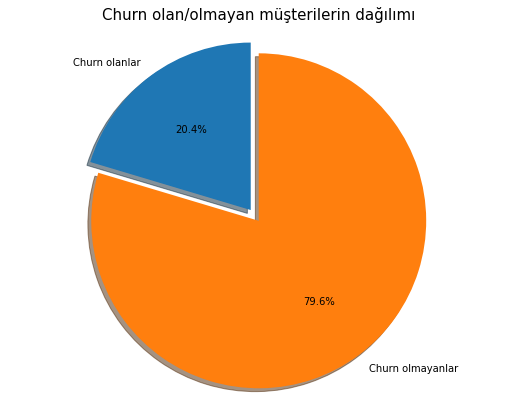

In [859]:
labels = 'Churn olanlar', 'Churn olmayanlar'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.08)
fig1, ax1 = plt.subplots(figsize=(9, 7))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Churn olan/olmayan müşterilerin dağılımı", size = 15)
plt.show()

In [860]:
df["Exited"].value_counts() #Hedef değişken

0    7963
1    2037
Name: Exited, dtype: int64

Veri setindeki 0-1 dengesi: % 0.204


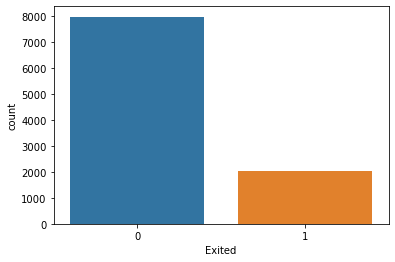

In [861]:
print("Veri setindeki 0-1 dengesi: %" ,1632/8000)                  
sns.countplot(df['Exited'],label="Count");

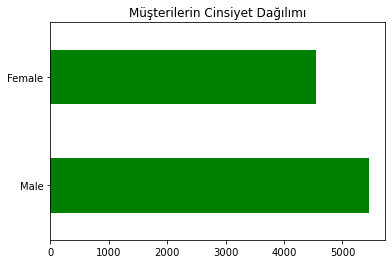

In [862]:
df["Gender"].value_counts().plot.barh(color="g").set_title("Müşterilerin Cinsiyet Dağılımı");

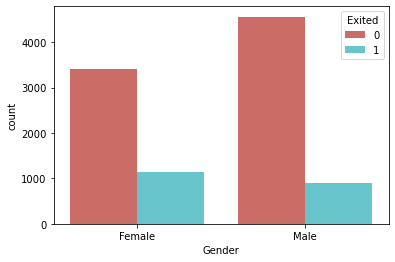

In [863]:
sns.countplot(x="Gender", hue="Exited", data=df,palette="hls");

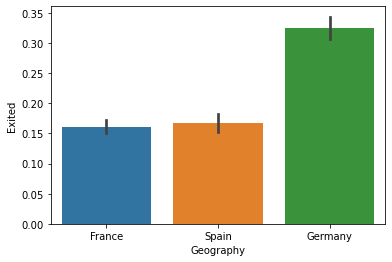

In [864]:
sns.barplot(x="Geography", y="Exited", data=df);

In [865]:
ratio=df["Geography"].value_counts()/len(df)
print(ratio)

France     0.5014
Germany    0.2509
Spain      0.2477
Name: Geography, dtype: float64


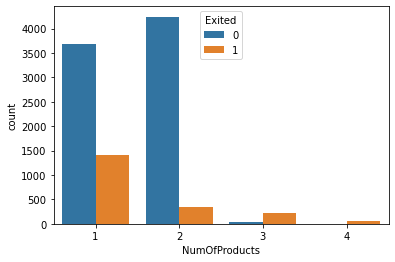

In [866]:
sns.countplot(x = "NumOfProducts", hue = "Exited" ,data = df);

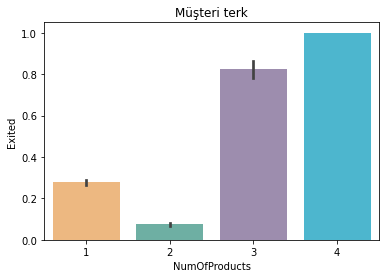

In [867]:
sns.barplot(x='NumOfProducts',
            y='Exited',
            data=df,
            palette=['#FFB86F', '#63BAAA', '#9D88B3', '#38c4e3']).set_title("Müşteri terk");

In [868]:
ratio=df["NumOfProducts"].value_counts()/len(df)
print(ratio)

1    0.5084
2    0.4590
3    0.0266
4    0.0060
Name: NumOfProducts, dtype: float64


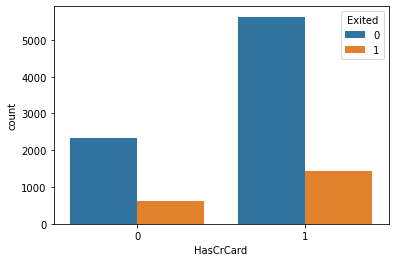

In [869]:
sns.countplot(x='HasCrCard', hue= 'Exited',data = df);

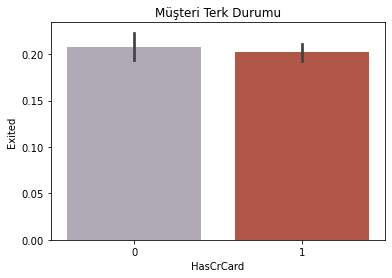

In [870]:
sns.barplot(x='HasCrCard',
            y='Exited',
            data=df,
            palette=['#B0A8B9','#C34A36']).set_title("Müşteri Terk Durumu");

- Bankayı terk eden müşterilerin çoğunluğunun kredi kartına sahip olduğunu gözlemliyoruz.Ancak yukarıdaki grafiğe bakılırsa bankadaki müşterilerin bankayı terk etmelerinde bir etkisi olmadığı yorumunu yapabiliriz.

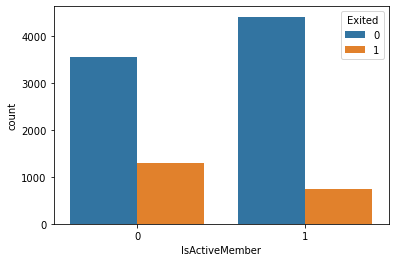

In [871]:
sns.countplot(x="IsActiveMember", hue="Exited", data=df);

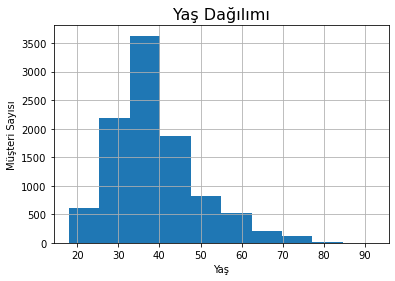

In [872]:
df["Age"].hist()
plt.xlabel("Yaş")
plt.ylabel("Müşteri Sayısı")
plt.title("Yaş Dağılımı", fontsize=16)
plt.show()

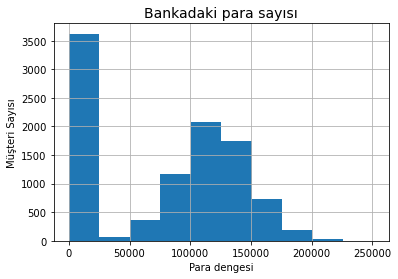

In [873]:
df["Balance"].hist()
plt.xlabel("Para dengesi")
plt.ylabel("Müşteri Sayısı")
plt.title("Bankadaki para sayısı", fontsize=14)
plt.show()

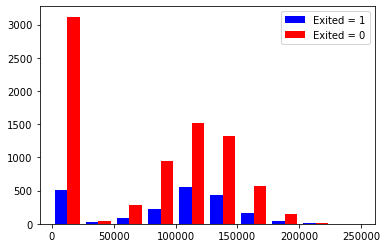

In [874]:
balance1 = df[df.Exited== 1].Balance
balance2 = df[df.Exited== 0].Balance

plt.hist([balance1, balance2], color = ['blue', 'red'], label = ['Exited = 1', 'Exited = 0'] )
plt.legend();

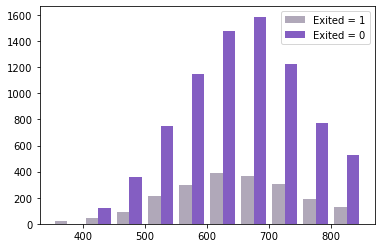

In [875]:
creditscore1 = df[df.Exited== 1].CreditScore
creditscore2 = df[df.Exited== 0].CreditScore

plt.hist([creditscore1, creditscore2], color = ['#B0A8B9', '#845EC2'], label = ['Exited = 1', 'Exited = 0'] )
plt.legend();

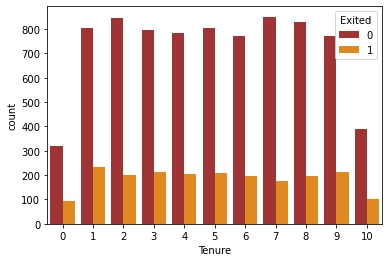

In [876]:
sns.countplot(x="Tenure", hue="Exited", data=df, palette=['firebrick', 'darkorange']);

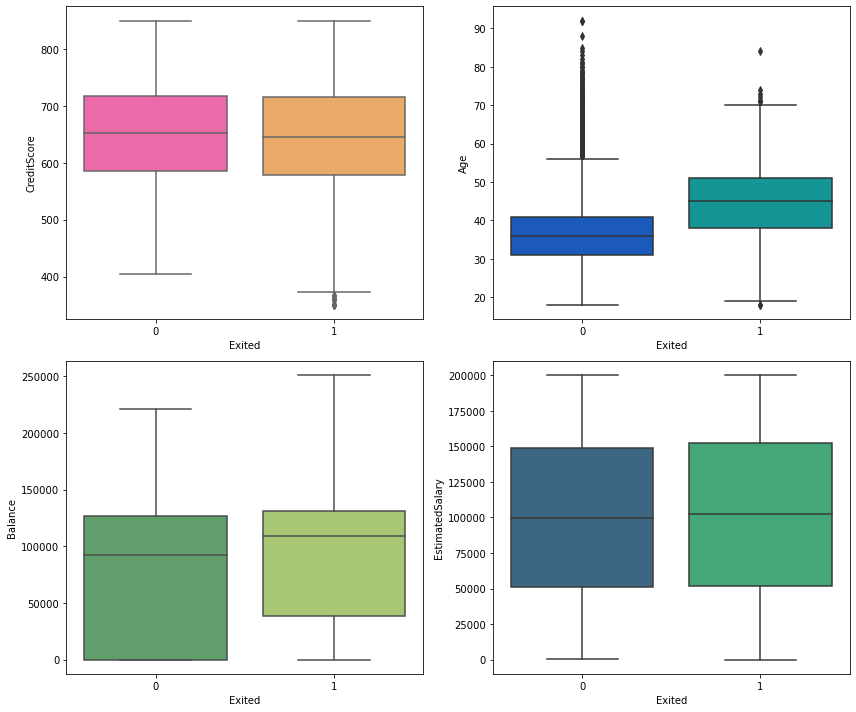

In [877]:
fig, ax = plt.subplots(2, 2, figsize = (12, 10))

sns.boxplot(x = 'Exited', y = 'CreditScore', data = df, ax = ax[0][0], palette= 'spring')
sns.boxplot(x = 'Exited', y = 'Age', data = df, ax = ax[0][1], palette= 'winter')
sns.boxplot(x = 'Exited', y = 'Balance', data = df, ax = ax[1][0], palette= 'summer')
sns.boxplot(x = 'Exited', y = 'EstimatedSalary', data = df, ax = ax[1][1],  palette= 'viridis')

plt.tight_layout()
plt.show()

- Kredi skoruyla müşterilerin bankayı terk etme durumları arasında pek bir fark gözükmüyor.
- Yaş değişkeniyle churn olma durumu karşılaştırılınca, daha yaşlı müşterilerin bankayı terk etme durumları genç müşterilere göre fazla olduğu gözlemleniyor.Ancak 70 yaş üzeri müşterilerin çoğunluğunun da bankayı terk etmediğini söyleyebiliriz.
- Bankada yüksek miktarda parası olan müşterilerin bankayı terk ettiğini Balance-Exited grafiğine bakarak yorumlayabiliriz.
- Tahmini maaş ile churn olma durumu arasında pek bir fark olmadığını gözlemliyoruz.

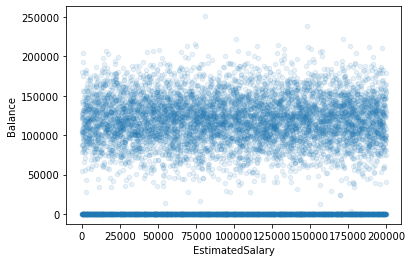

In [878]:
df.plot(kind="scatter", x="EstimatedSalary", y="Balance", alpha=0.1);

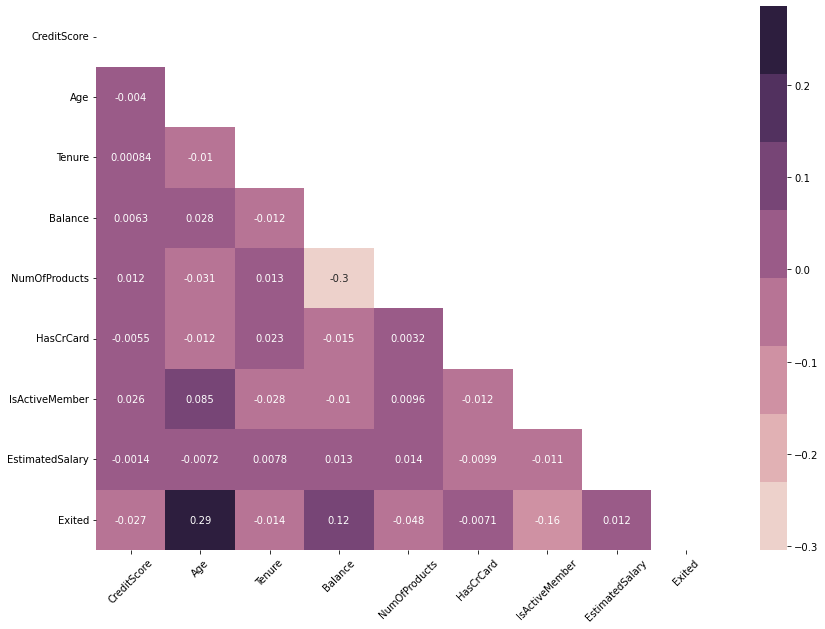

In [879]:
plt.figure(figsize=(14, 10))

matrix = np.triu(df.corr())

sns.heatmap(df.corr(), annot=True, cmap = sns.cubehelix_palette(8), mask=matrix)

plt.xticks(rotation=45);

## Veri Önişleme

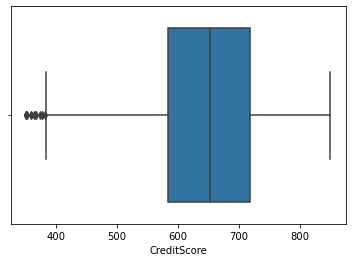

In [955]:
sns.boxplot(x=df["CreditScore"]);

In [956]:
#Yeni bir değişken oluşturup aykırı değerleri bu değişken üzerinden baskılayıp daha sonra asıl veri setine atayacağız.
dff= df.select_dtypes(include = ['float64', 'int64'])  

df_cr=dff["CreditScore"]

Q1=df_cr.quantile(0.25)          
Q3=df_cr.quantile(0.75)
IQR=Q3-Q1
print("IQR:",IQR,"Q1:", Q1, "Q3:",Q3)

alt_sinir = Q1-1.5*IQR           #Eşik değer hesaplama
ust_sinir = Q3+1.5*IQR
print("","alt_sinir:",alt_sinir, "\n","ust_sinir:",ust_sinir)

IQR: 134.0 Q1: 584.0 Q3: 718.0
 alt_sinir: 383.0 
 ust_sinir: 919.0


In [957]:
(df_cr < alt_sinir) | (df_cr > ust_sinir)  #Alt sınırdan küçük veya üst sınırdan büyük değerleri sorguladık

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Name: CreditScore, Length: 10000, dtype: bool

In [958]:
#Aykırı değerler alt sınırda olduğu için yeni değişkeni alt sınırdan küçük olan değişkenlere atıyoruz.
aykiri_cr = (df_cr < alt_sinir)    

df_cr[aykiri_cr] = alt_sinir    #Aykırı değerleri alt sınır değerine baskılıyoruz.

df["CreditScore"]=df_cr   

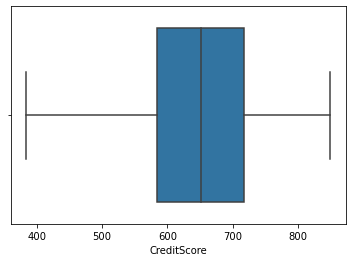

In [959]:
sns.boxplot(x=df["CreditScore"]);

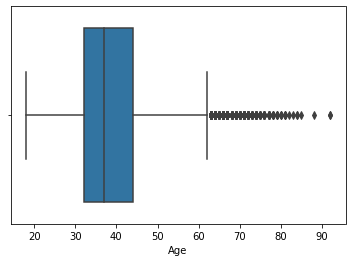

In [960]:
sns.boxplot(x=df["Age"]);

In [961]:
x=df[(df["Age"]>=65)].value_counts()
x_churn=(df[(df["Age"]>=65) & (df["Exited"]==1)]).value_counts()
print("65 yaş üstü müşteri sayısı:",x.size )
print("65 yaş üstü müşteri kayıp sayısı:",x_churn.size )

65 yaş üstü müşteri sayısı: 282
65 yaş üstü müşteri kayıp sayısı: 43


**One-Hot Encoding**

- Model kurmaya başlamadan önce veri setindeki kategorik değişkenleri numeric değişkenlere çeviriyoruz.Ancak one-hot encoding işlemi yaptığımızda değişkenler dummy tuzağına yakalanmaması, yani bilgi karmaşıklılığına yol açmaması için one-hot işlemi yaptığımız değişkenlerin asıl sütunlarını ve oluşturduğumuz yeni değişkenlerden birini siliyoruz.

In [962]:
df_one_hot=pd.get_dummies(df, columns = ["Geography"], prefix = ["Geography"])

df=df_one_hot


In [963]:
df.drop("Geography_France", axis=1, inplace=True)

In [964]:
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,Female,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,Female,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,Female,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,Male,39,5,0.00,2,1,0,96270.64,0,0,0
9996,516,Male,35,10,57369.61,1,1,1,101699.77,0,0,0
9997,709,Female,36,7,0.00,1,0,1,42085.58,1,0,0
9998,772,Male,42,3,75075.31,2,1,0,92888.52,1,1,0


**Label Encoding**

In [965]:
lbe = LabelEncoder()

lbe.fit_transform(df["Gender"])

array([0, 0, 0, ..., 0, 1, 0])

In [966]:
df["Gender_"] = lbe.fit_transform(df["Gender"])

df.drop("Gender", axis=1, inplace=True)


## Model

In [967]:
y=df["Exited"]                    
X=df.drop("Exited", axis=1)

In [968]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=0.2, shuffle = True, random_state = 8)

In [969]:
print("X_train",X_train.shape)
print("X_test",X_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)


X_train (8000, 11)
X_test (2000, 11)
y_train (8000,)
y_test (2000,)


In [970]:
y_train.value_counts()

0    6376
1    1624
Name: Exited, dtype: int64

In [971]:
over = SMOTE(sampling_strategy='auto', random_state=3012)
X_train, y_train = over.fit_resample(X_train, y_train)

y_train.value_counts()

0    6376
1    6376
Name: Exited, dtype: int64

Makine öğrenmesi modelleri olarak;
- Random Forest
- Gradient Boosting
- XGBoost
- LightGBM modelleri kullandım.

### Random Forest

In [972]:
rf_model = RandomForestClassifier(random_state=0).fit(X_train, y_train)     #Modelimizi kuruyoruz.

In [973]:
y_pred = rf_model.predict(X_test)        #Test verilerini modele verip tahmin işlemi yapmasını istiyoruz 
rf_model_accuracy=accuracy_score(y_test, y_pred)
rf_model_accuracy

0.821

In [974]:
print("Cross validation skoru:",cross_val_score(rf_model, X_test, y_test, cv = 10).mean())

Cross validation skoru: 0.8644999999999999


In [975]:
def rf_evaluate(rf_model, X_train, X_test, y_train, y_test):
    rf_model.fit(X_train, y_train)
    
    print ("Accuracy skore değeri:")
    print (rf_model.score(X_test, y_test))
    y_pred = rf_model.predict(X_test)

    print ("Classification Report:")
    print (metrics.classification_report(y_test, y_pred))
    print ("Confusion Matrix:")
    print (metrics.confusion_matrix(y_test, y_pred))

rf_evaluate(rf_model, X_train, X_test, y_train, y_test)

Accuracy skore değeri:
0.821
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.87      0.89      1587
           1       0.56      0.64      0.60       413

    accuracy                           0.82      2000
   macro avg       0.73      0.75      0.74      2000
weighted avg       0.83      0.82      0.83      2000

Confusion Matrix:
[[1379  208]
 [ 150  263]]


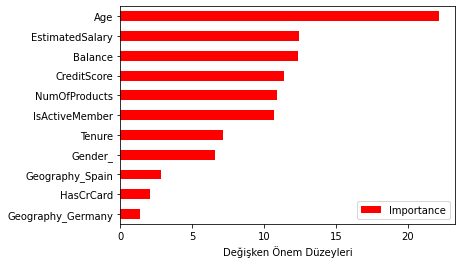

In [976]:
Importance = pd.DataFrame({"Importance": rf_model.feature_importances_*100},
                         index = X_train.columns)

Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri");

[[1379  208]
 [ 150  263]]


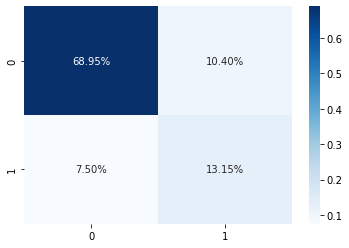

In [977]:
cf_matrix_rf = confusion_matrix(y_test, y_pred)
print(cf_matrix_rf)
sns.heatmap(cf_matrix_rf/np.sum(cf_matrix_rf), annot=True, 
            fmt='.2%', cmap='Blues');

- Confusion matrix tablosuna bakarsak modelimizin ne kadar doğru ve ne kadar yanlış tahmin yaptığını görebiliriz.

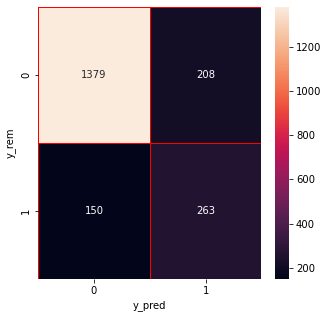

In [978]:
y_pred = rf_model.predict(X_test)
y_rf_true=y_pred
cm = confusion_matrix(y_test ,y_rf_true)

f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_rem")
plt.show()

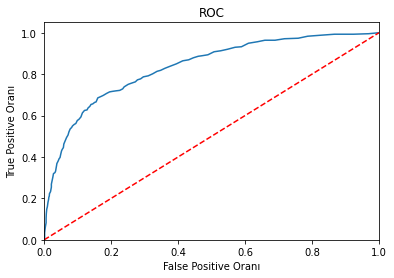

In [979]:
rf_roc_auc = roc_auc_score(y_test, rf_model.predict(X_test))

fpr, tpr, thresholds = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

In [980]:
model_roc_auc = roc_auc_score(y_test,y_pred) 
print ("Eğrinin altındaki alan (AUC) : ",model_roc_auc,"\n")
fpr,tpr,thresholds = roc_curve(y_test,y_pred)

Eğrinin altındaki alan (AUC) :  0.7528694858802834 



### Gradient Boosting

In [981]:
gbm_model = GradientBoostingClassifier(random_state=1).fit(X_train, y_train)

In [982]:
y_pred = gbm_model.predict(X_test)

confusion_matrix(y_test, y_pred)

array([[1343,  244],
       [ 129,  284]], dtype=int64)

In [983]:
gbm_model_accuracy=gbm_model.score(X_test,y_test)
gbm_model_accuracy

0.8135

In [984]:
print("Cross validation skoru:",cross_val_score(gbm_model, X_test, y_test, cv = 10).mean())

Cross validation skoru: 0.8635000000000002


In [985]:
def gbm_evaluate(gbm_model, X_train, X_test, y_train, y_test):
    gbm_model.fit(X_train, y_train)
    
    print ("Accuracy skore değeri:")
    print (gbm_model.score(X_test,y_test))
    y_pred = gbm_model.predict(X_test)

    print ("Classification Report:")
    print (metrics.classification_report(y_test, y_pred))
    print ("Confusion Matrix:")
    print (metrics.confusion_matrix(y_test, y_pred))

gbm_evaluate(gbm_model, X_train, X_test, y_train, y_test)

Accuracy skore değeri:
0.8135
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.85      0.88      1587
           1       0.54      0.69      0.60       413

    accuracy                           0.81      2000
   macro avg       0.73      0.77      0.74      2000
weighted avg       0.84      0.81      0.82      2000

Confusion Matrix:
[[1343  244]
 [ 129  284]]


[[1343  244]
 [ 129  284]]


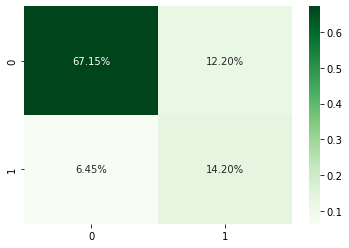

In [986]:
cf_matrix_gbm = confusion_matrix(y_test, y_pred)
print(cf_matrix_gbm)
sns.heatmap(cf_matrix_gbm/np.sum(cf_matrix_gbm), annot=True, 
            fmt='.2%', cmap='Greens');

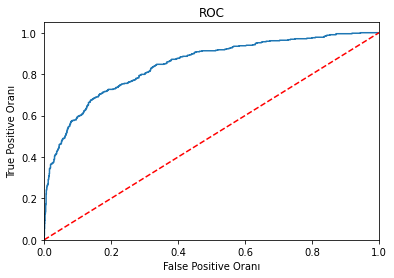

In [987]:
gbm_roc_auc = roc_auc_score(y_test, gbm_model.predict(X_test))

fpr, tpr, thresholds = roc_curve(y_test, gbm_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % gbm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

In [989]:
model_roc_auc = roc_auc_score(y_test,y_pred) 
print ("Eğrinin altındaki alan (AUC) : ",model_roc_auc,"\n")
fpr,tpr,thresholds = roc_curve(y_test,y_pred)

Eğrinin altındaki alan (AUC) :  0.7669510596843909 



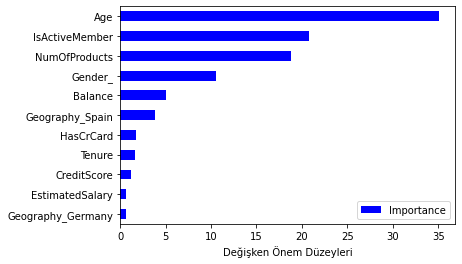

In [990]:
Importance = pd.DataFrame({"Importance": gbm_model.feature_importances_*100},
                         index = X_train.columns)

Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "b")

plt.xlabel("Değişken Önem Düzeyleri");

### XGBoost

In [991]:
xgb_model=XGBClassifier().fit(X_train, y_train)

In [992]:
y_pred = xgb_model.predict(X_test)

print("Accuracy skoru:",accuracy_score(y_test, y_pred))
print("Cross validation skoru:",cross_val_score(xgb_model, X_test,y_test, cv = 10).mean())

Accuracy skoru: 0.816
Cross validation skoru: 0.8535


In [919]:
def xgb_evaluate(xgb_model, X_train, X_test, y_train, y_test):
    xgb_model.fit(X_train, y_train)
    
    print ("Accuracy skore değeri:")
    print (xgb_model.score(X_test, y_test))
    y_pred = xgb_model.predict(X_test)

    print ("Classification Report:")
    print (metrics.classification_report(y_test, y_pred))
    print ("Confusion Matrix:")
    print (metrics.confusion_matrix(y_test, y_pred))

xgb_evaluate(xgb_model, X_train, X_test, y_train, y_test)

Accuracy skore değeri:
0.816
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.87      0.88      1587
           1       0.55      0.61      0.58       413

    accuracy                           0.82      2000
   macro avg       0.72      0.74      0.73      2000
weighted avg       0.82      0.82      0.82      2000

Confusion Matrix:
[[1380  207]
 [ 161  252]]


[[1343  244]
 [ 129  284]]


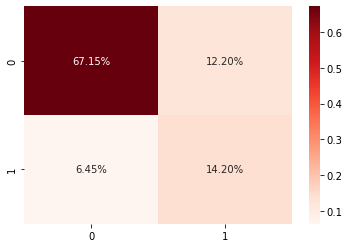

In [920]:
cf_matrix_xgb = confusion_matrix(y_test, y_pred)
print(cf_matrix_xgb)
sns.heatmap(cf_matrix_xgb/np.sum(cf_matrix_xgb), annot=True, 
            fmt='.2%', cmap='Reds');

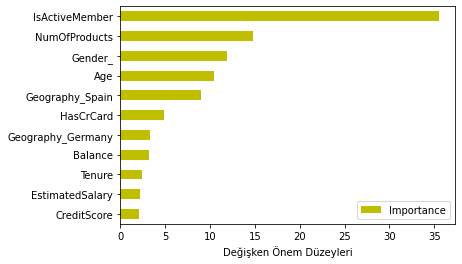

In [921]:
Importance = pd.DataFrame({"Importance": xgb_model.feature_importances_*100},
                         index = X_train.columns)

Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "y")

plt.xlabel("Değişken Önem Düzeyleri");

### LightGBM

In [922]:
lgbm_model = LGBMClassifier(random_state=5).fit(X_train, y_train)

In [923]:
y_pred = lgbm_model.predict(X_test)

print("Accuracy skoru:",accuracy_score(y_test, y_pred))
print("Cross validation skoru:",cross_val_score(lgbm_model, X_test, y_test, cv = 10).mean())

Accuracy skoru: 0.829
Cross validation skoru: 0.8615


In [924]:
def lgbm_evaluate(lgbm_model, X_train, X_test, y_train, y_test):
    lgbm_model.fit(X_train, y_train)
    
    print ("Accuracy skore değeri:")
    print (lgbm_model.score(X_test, y_test))
    y_pred = lgbm_model.predict(X_test)

    print ("Classification Report:")
    print (metrics.classification_report(y_test, y_pred))
    print ("Confusion Matrix:")
    print (metrics.confusion_matrix(y_test, y_pred))

lgbm_evaluate(lgbm_model, X_train, X_test, y_train, y_test)

Accuracy skore değeri:
0.829
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1587
           1       0.57      0.68      0.62       413

    accuracy                           0.83      2000
   macro avg       0.74      0.77      0.75      2000
weighted avg       0.84      0.83      0.83      2000

Confusion Matrix:
[[1379  208]
 [ 134  279]]


In [925]:
lgbm_model.predict_proba(X_test)[0:10]

array([[0.13092569, 0.86907431],
       [0.46710118, 0.53289882],
       [0.86149704, 0.13850296],
       [0.97840007, 0.02159993],
       [0.27629175, 0.72370825],
       [0.05091813, 0.94908187],
       [0.74658472, 0.25341528],
       [0.94716847, 0.05283153],
       [0.86223693, 0.13776307],
       [0.14648355, 0.85351645]])

In [926]:
y_test[0:10]

837     0
697     1
1197    0
6759    0
5651    0
3913    1
3056    0
4291    0
520     1
5452    1
Name: Exited, dtype: int64

[[1379  208]
 [ 134  279]]


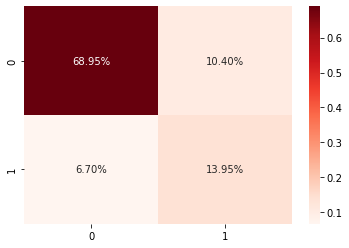

In [927]:
cf_matrix_lgbm = confusion_matrix(y_test, y_pred)
print(cf_matrix_lgbm)
sns.heatmap(cf_matrix_lgbm/np.sum(cf_matrix_lgbm), annot=True, 
            fmt='.2%', cmap='Reds');

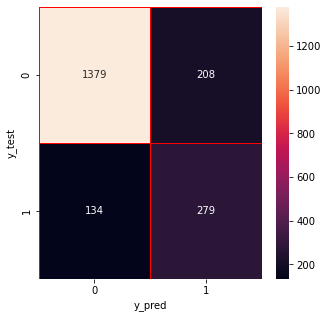

In [928]:
y_pred = lgbm_model.predict(X_test)
y_lgbm_true=y_pred
cm = confusion_matrix(y_test,y_lgbm_true)

f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.show()

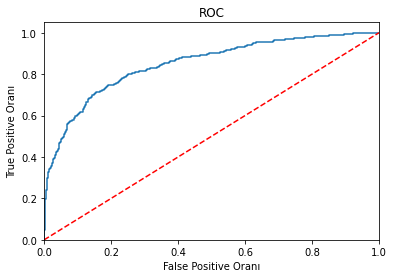

In [929]:
lgbm_roc_auc = roc_auc_score(y_test, lgbm_model.predict(X_test))

fpr, tpr, thresholds = roc_curve(y_test, lgbm_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % lgbm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

In [930]:
model_roc_auc = roc_auc_score(y_test,y_pred) 
print ("Eğrinin altındaki alan (AUC) : ",model_roc_auc,"\n")
fpr,tpr,thresholds = roc_curve(y_test,y_pred)

Eğrinin altındaki alan (AUC) :  0.7722399459287095 



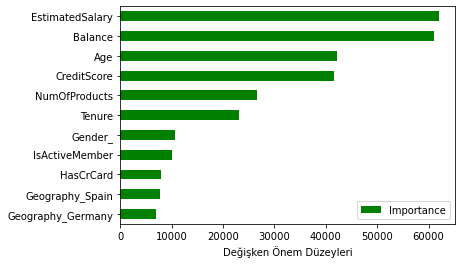

In [931]:
Importance = pd.DataFrame({"Importance": lgbm_model.feature_importances_*100},
                         index = X_train.columns)

Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "g")

plt.xlabel("Değişken Önem Düzeyleri");